In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Classification problems algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32560, 15)

In [6]:
# check for duplicate records

df.duplicated().sum()

24

In [7]:
# drop duplicate records

df.drop_duplicates(inplace=True)

df.shape

(32536, 15)

In [8]:
# Check for records with null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Some columns are of object types and not available for analysis.
I will check and convert to numeric type

In [10]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [11]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

       Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4        

In [12]:
df['Income'].unique()

array([0, 1])

In [13]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


# <=50K is converted to 0 while >50K is converted to 1

In [14]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.868638,1.897843e+05,10.297547,10.081725,2.611384,6.573027,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.721508,0.240933
std,13.638193,1.456363,1.055563e+05,3.870195,2.571622,1.506304,4.229473,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,7.820842,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.369932e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Lets check for high performing features

In [16]:
x = df.drop('Income', axis=1)

y = df['Income']

In [18]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif


# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k='all')
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(15,'score'))

      feature_name        score
4    Education_num  4120.959861
7     Relationship  2186.644675
0              Age  1885.286977
12  Hours_per_week  1811.486632
10    Capital_gain  1708.021444
9              Sex  1591.944711
5   Marital_status  1344.129315
11    Capital_loss   753.959104
3        Education   206.203986
6       Occupation   186.010145
8             Race   168.848540
1        Workclass    87.213326
13  Native_country     7.943124
2           Fnlwgt     2.949442


Native_country, Fnlwgt are not having significant impact on the label, I will drop them


In [19]:
df.drop(columns=['Native_country','Fnlwgt'], inplace=True)

df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,13,2,4,0,4,1,0,0,13,0
1,38,4,11,9,0,6,1,4,1,0,0,40,0
2,53,4,1,7,2,6,0,2,1,0,0,40,0
3,28,4,9,13,2,10,5,2,0,0,0,40,0
4,37,4,12,14,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,12,2,13,5,4,0,0,0,38,0
32556,40,4,11,9,2,7,0,4,1,0,0,40,1
32557,58,4,11,9,6,1,4,4,0,0,0,40,0
32558,22,4,11,9,4,1,3,4,1,0,0,20,0


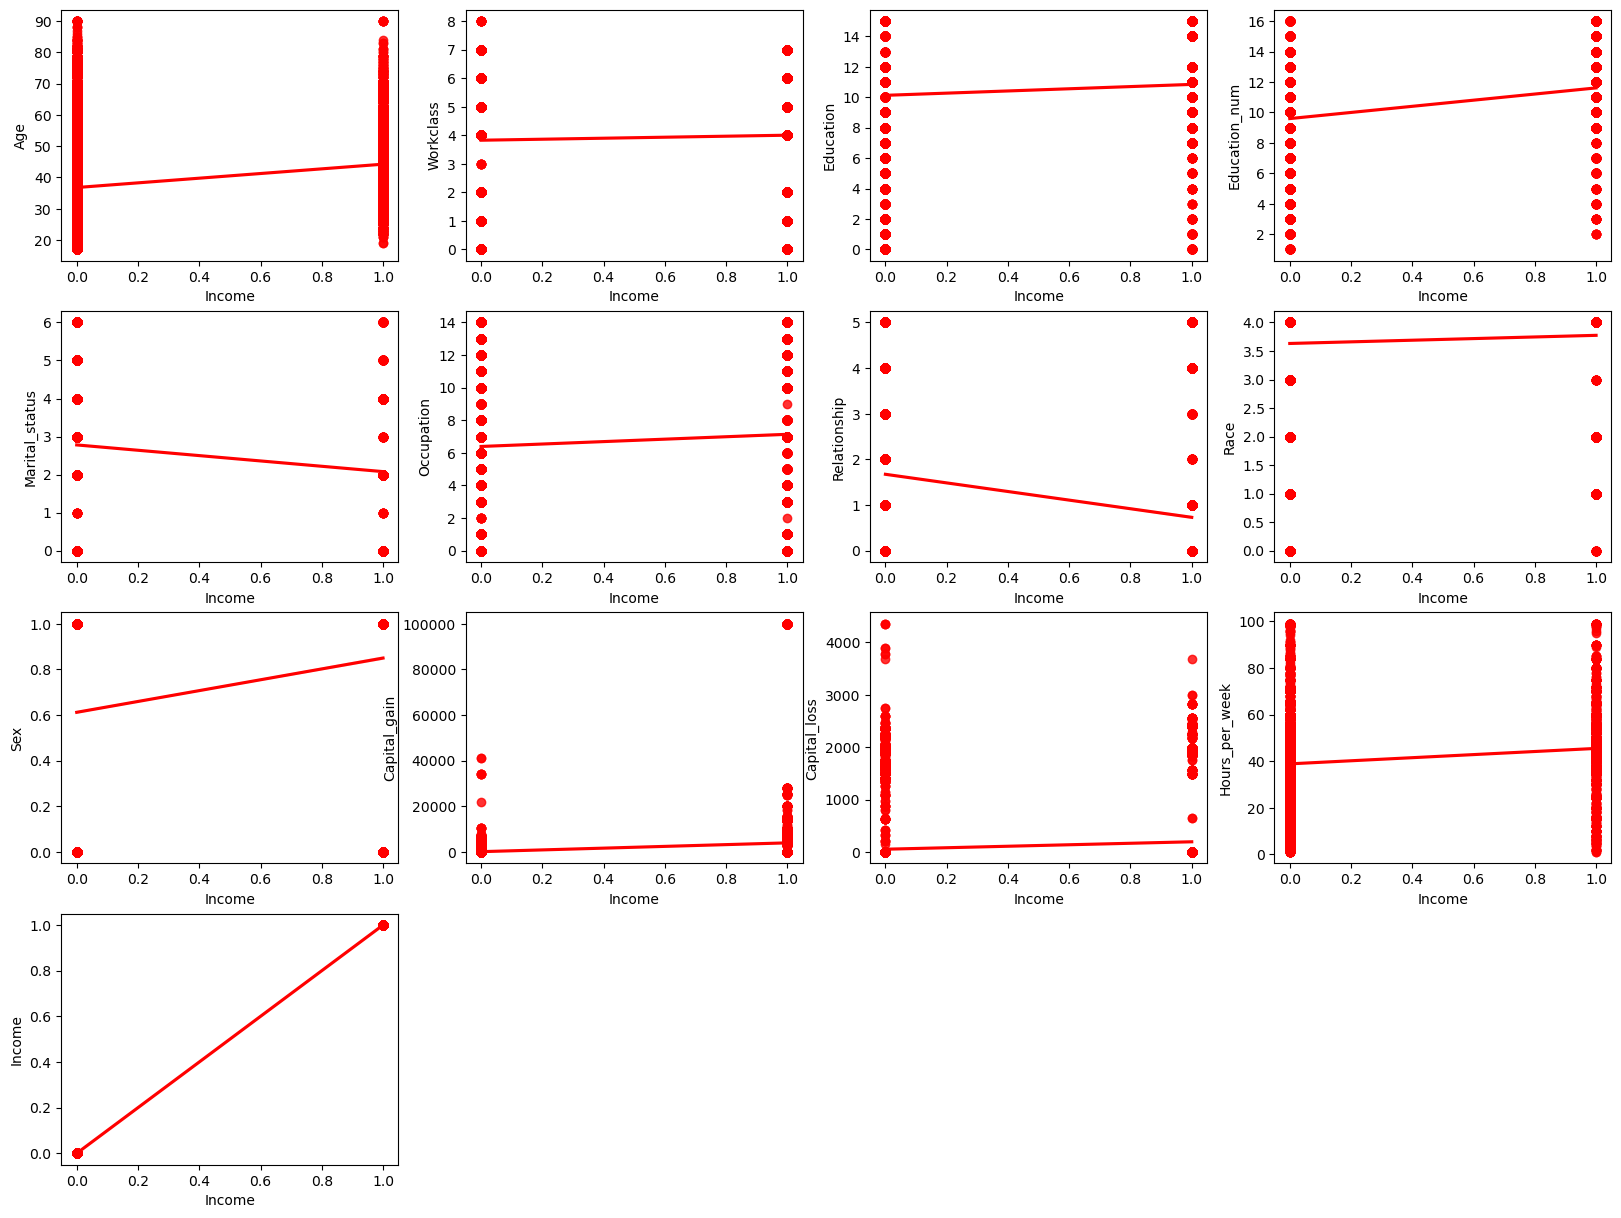

In [21]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,15))

p = 1

for i in df:
    if p <= 18:
        plt.subplot(4,4,p)
        snb.regplot(x='Income', y=i, data=df, color='r')
        plt.xlabel='Income'
        plt.ylabel=i
        
    p += 1

plt.show()

I will further drop Capital_loss ,Education,Occupation,Race,Workclass because their contribution to the label is insignificant

In [22]:
df.drop(columns=['Capital_loss','Education','Occupation','Race','Workclass'], inplace=True)

df

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,0,1,0,13,0
1,38,9,0,1,1,0,40,0
2,53,7,2,0,1,0,40,0
3,28,13,2,5,0,0,40,0
4,37,14,2,5,0,0,40,0
...,...,...,...,...,...,...,...,...
32555,27,12,2,5,0,0,38,0
32556,40,9,2,0,1,0,40,1
32557,58,9,6,4,0,0,40,0
32558,22,9,4,3,1,0,20,0


# Need to check for outliers

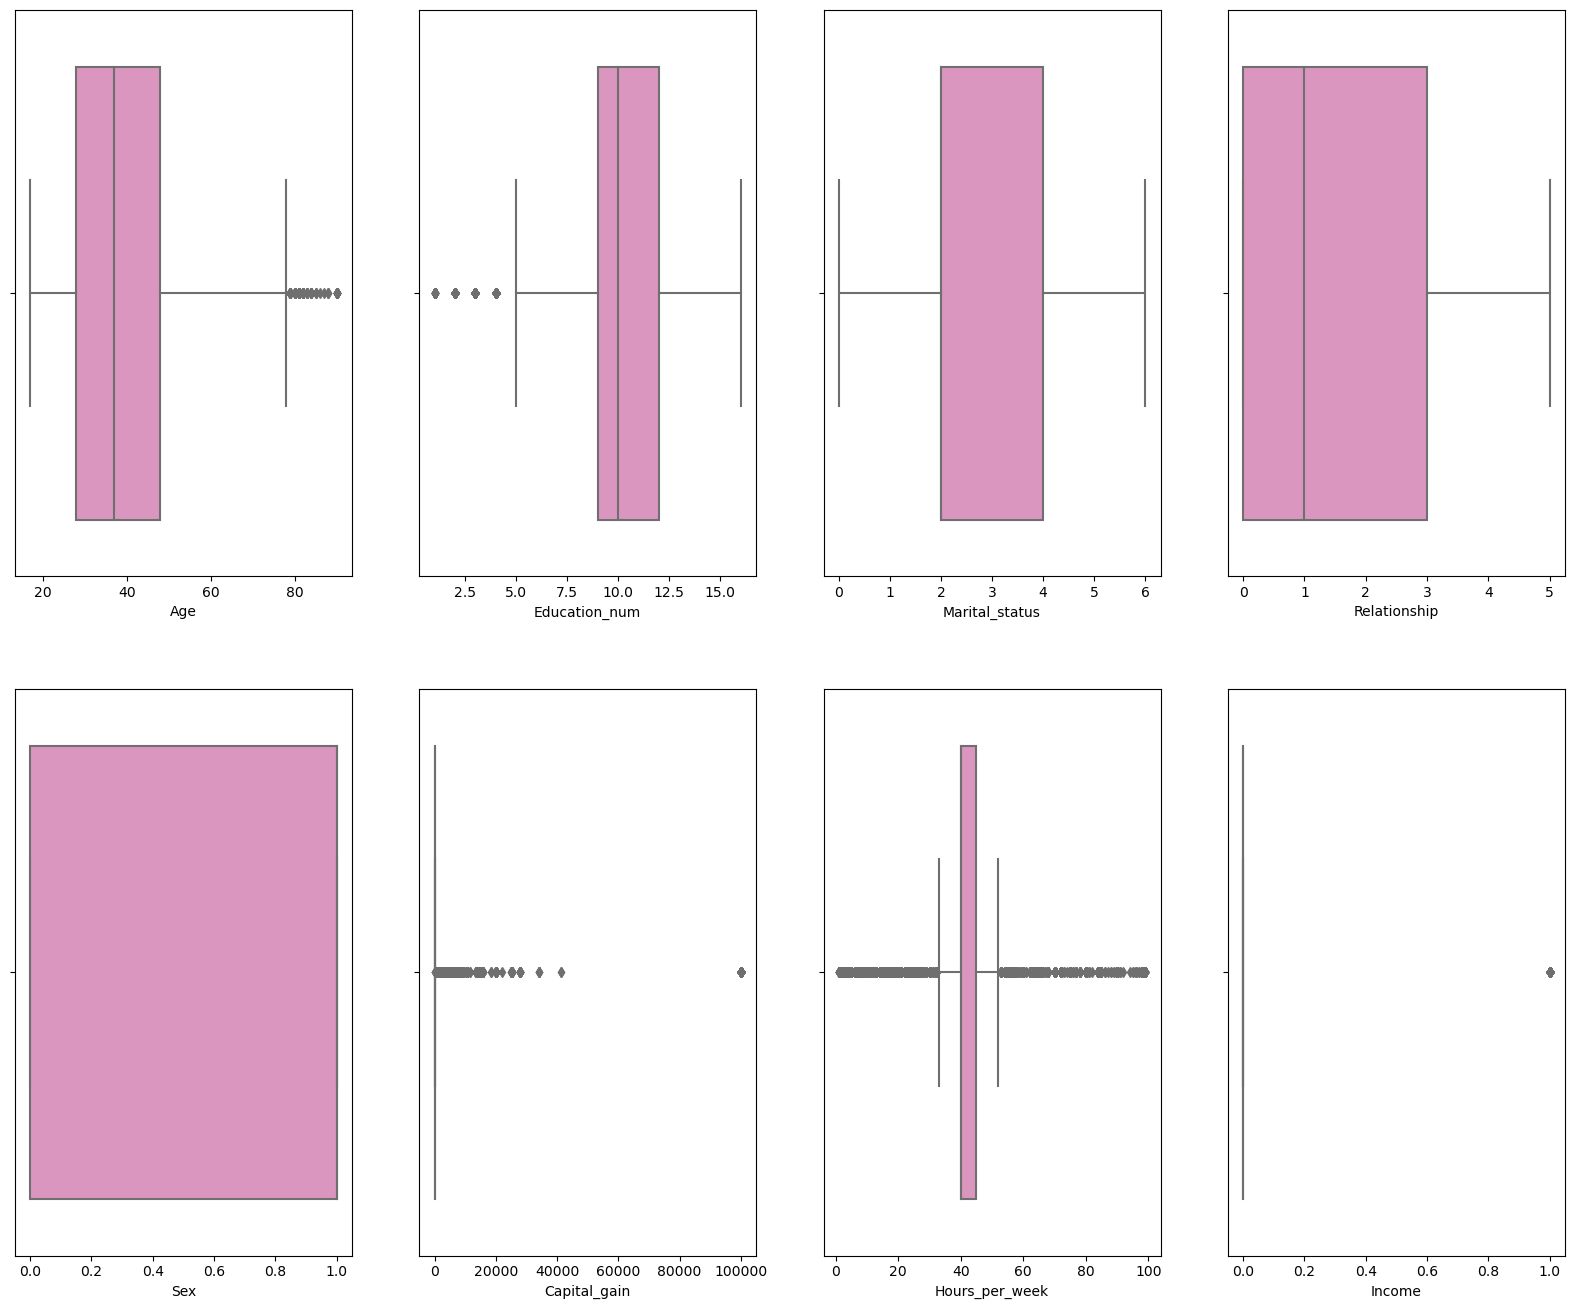

In [23]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=9:
        plt.subplot(3,4,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

In [24]:
#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['Age', 'Education_num', 'Capital_gain', 'Hours_per_week']]
z=np.abs(zscore(out_features))

z

,Age,Education_num,Capital_gain,Hours_per_week
0,0.836961,1.134817,0.145969,2.222450
1,0.042934,0.420646,0.145969,0.035664
2,1.056935,1.198377,0.145969,0.035664
3,0.776180,1.134817,0.145969,0.035664
4,0.116259,1.523683,0.145969,0.035664
...,...,...,...,...
32555,0.849505,0.745951,0.145969,0.197648
32556,0.103715,0.420646,0.145969,0.035664
32557,1.423558,0.420646,0.145969,0.035664
32558,1.216128,0.420646,0.145969,1.655506


In [25]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([    9,    27,    76,   105,   156,   159,   188,   220,   221,
          223,   271,   298,   415,   429,   462,   485,   519,   535,
          588,   703,   917,   928,   931,   934,  1033,  1035,  1039,
         1063,  1065,  1138,  1167,  1171,  1199,  1245,  1261,  1271,
         1290,  1367,  1410,  1416,  1457,  1481,  1499,  1527,  1561,
         1615,  1633,  1681,  1683,  1729,  1763,  1764,  1770,  1823,
         1825,  1886,  1912,  1928,  1934,  1986,  2014,  2102,  2302,
         2318,  2332,  2357,  2360,  2428,  2443,  2580,  2583,  2593,
         2670,  2706,  2753,  2760,  2816,  2860,  2883,  2890,  2905,
         2919,  2931,  2945,  2958,  2962,  3091,  3104,  3174,  3210,
         3224,  3231,  3290,  3301,  3342,  3367,  3445,  3536,  3577,
         3591,  3748,  3772,  3776,  3835,  3908,  3940,  3962,  4069,
         4085,  4090,  4100,  4106,  4108,  4235,  4293,  4302,  4307,
         4311,  4321,  4325,  4336,  4347,  4388,  4420,  4440,  4523,
      

In [42]:
df2 = df[(z<3).all(axis=1)]

df2

,Age,Education_num,Marital_status,Relationship,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,-1.109145,0.703036,-1.114219,13,0
1,38,9,0,0.180757,0.703036,0.197513,40,0
2,53,7,2,-1.109145,0.703036,-1.114219,40,0
3,28,13,2,1.498149,-1.422403,1.480172,40,0
4,37,14,2,1.498149,-1.422403,1.480172,40,0
...,...,...,...,...,...,...,...,...
32555,27,12,2,1.498149,-1.422403,1.480172,38,0
32556,40,9,2,-1.109145,0.703036,-1.114219,40,1
32557,58,9,6,1.321232,-1.422403,1.310249,40,0
32558,22,9,4,1.085297,0.703036,1.082695,20,0


In [43]:
print('the shape of old data: ',df.shape[0])
print('the shape of new data: ',df2.shape[0])

print('percentage data loss after removing outliers ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

the shape of old data:  32536
the shape of new data:  31566
percentage data loss after removing outliers  2.9813130071305634


Percentage loss is not too much

<function matplotlib.pyplot.show(close=None, block=None)>

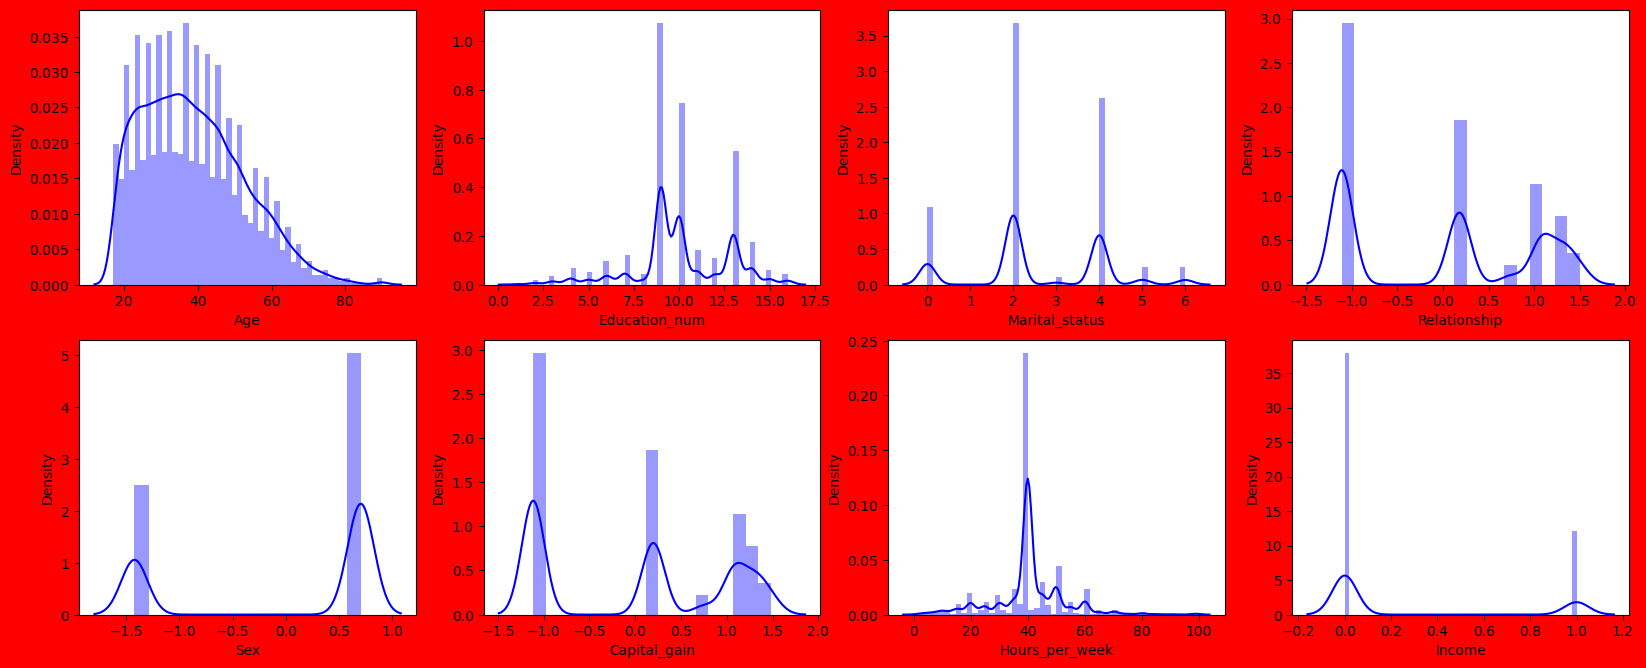

In [44]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df2:
    if p<= 12:
        ax = plt.subplot(6,4,p)
        snb.distplot(df[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

I observe some level of skewness but will double check with skew method

In [45]:
df2.skew()

Age               0.479575
Education_num    -0.166705
Marital_status   -0.030242
Relationship      0.054324
Sex              -0.704873
Capital_gain      0.034349
Hours_per_week   -0.348569
Income            1.237030
dtype: float64

In [46]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column
pt = PowerTransformer(method='yeo-johnson')

df['Relationship'] = pt.fit_transform(df['Relationship'].values.reshape(-1, 1))
df['Sex'] = pt.fit_transform(df['Sex'].values.reshape(-1, 1))
df['Capital_gain'] = pt.fit_transform(df['Relationship'].values.reshape(-1, 1))

df2.skew()


Age               0.479575
Education_num    -0.166705
Marital_status   -0.030242
Relationship      0.054324
Sex              -0.704873
Capital_gain      0.034349
Hours_per_week   -0.348569
Income            1.237030
dtype: float64

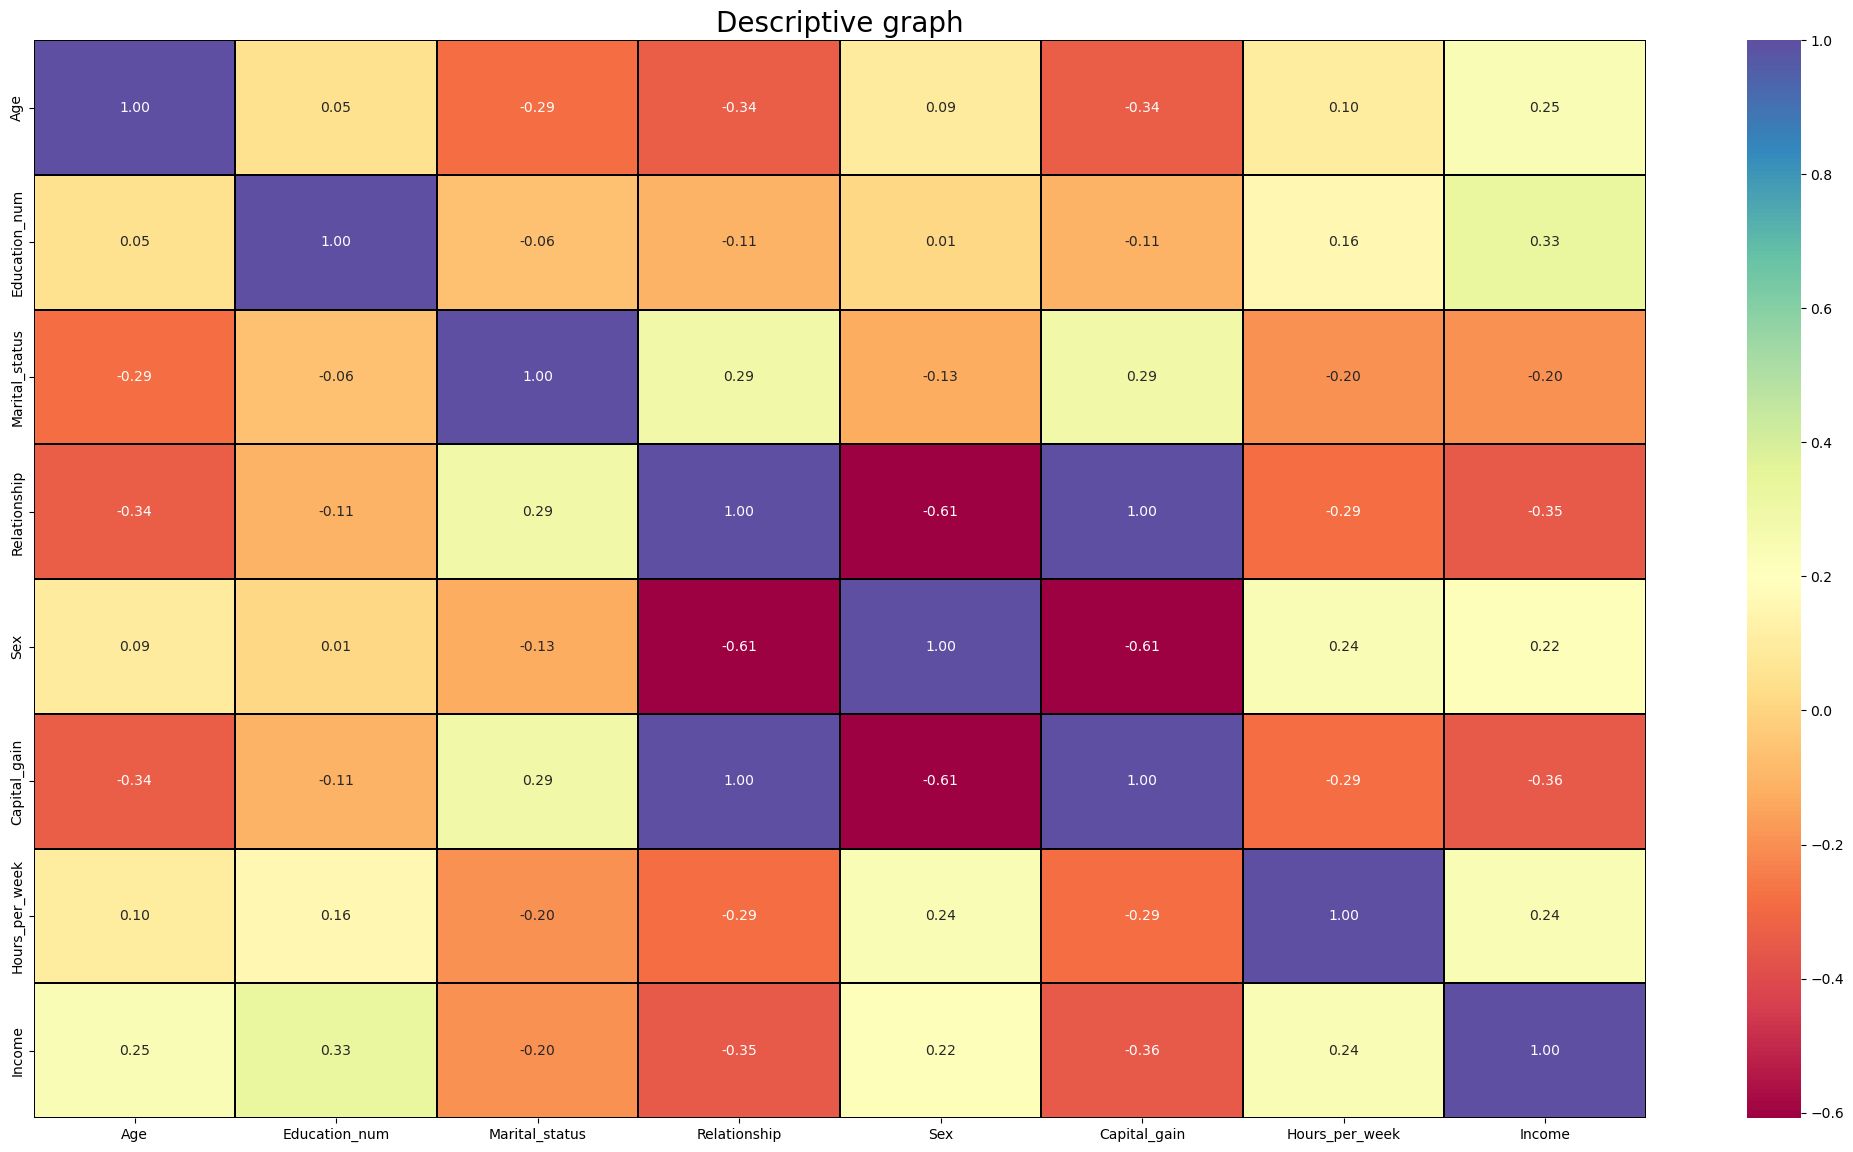

In [47]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

relationship and capital_gain is having multicolinearity, I will drop one with lower corelationship with income

In [48]:
# Droping relationship because it as coefficient of -0.35 while Capital_gain has -0.36

df2.drop('Relationship', axis=1, inplace=True)

df2

,Age,Education_num,Marital_status,Sex,Capital_gain,Hours_per_week,Income
0,50,13,2,0.703036,-1.114219,13,0
1,38,9,0,0.703036,0.197513,40,0
2,53,7,2,0.703036,-1.114219,40,0
3,28,13,2,-1.422403,1.480172,40,0
4,37,14,2,-1.422403,1.480172,40,0
...,...,...,...,...,...,...,...
32555,27,12,2,-1.422403,1.480172,38,0
32556,40,9,2,0.703036,-1.114219,40,1
32557,58,9,6,-1.422403,1.310249,40,0
32558,22,9,4,0.703036,1.082695,20,0


In [50]:
#Seperate the label from feature

x = df2.drop('Income', axis =1)
y = df2['Income']

In [51]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

x

,Age,Education_num,Marital_status,Sex,Capital_gain,Hours_per_week
0,0.882117,1.166973,-0.405610,0.707863,-1.120666,-2.427640
1,-0.019324,-0.452773,-1.734670,0.707863,0.190172,-0.003470
2,1.107477,-1.262647,-0.405610,0.707863,-1.120666,-0.003470
3,-0.770524,1.166973,-0.405610,-1.412703,1.471957,-0.003470
4,-0.094444,1.571910,-0.405610,-1.412703,1.471957,-0.003470
...,...,...,...,...,...,...
31561,-0.845644,0.762037,-0.405610,-1.412703,1.471957,-0.183038
31562,0.130916,-0.452773,-0.405610,0.707863,-1.120666,-0.003470
31563,1.483077,-0.452773,2.252509,-1.412703,1.302150,-0.003470
31564,-1.221244,-0.452773,0.923450,0.707863,1.074751,-1.799152


In [52]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.205370,Age
1,1.035638,Education_num
2,1.161955,Marital_status
3,1.648441,Sex
4,1.940804,Capital_gain
5,1.136752,Hours_per_week


They are all within acceptable threshold of 5

In [53]:
# Checking for imbalance in the label column

df2['Income'].value_counts()

0    24085
1     7481
Name: Income, dtype: int64

The difference between the 0s and 1s is too much. I will balance it using smote method

In [54]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)

In [55]:
y.value_counts()

0    24085
1    24085
Name: Income, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.8449934260604802  at random state :  96


In [57]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=maxRS)

In [58]:
# Classification Algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve 
from sklearn.model_selection import cross_val_score

#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8434018407030656
[[5884 1407]
 [ 856 6304]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      7291
           1       0.82      0.88      0.85      7160

    accuracy                           0.84     14451
   macro avg       0.85      0.84      0.84     14451
weighted avg       0.85      0.84      0.84     14451



In [59]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7668673448204276
[[5400 1891]
 [1478 5682]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76      7291
           1       0.75      0.79      0.77      7160

    accuracy                           0.77     14451
   macro avg       0.77      0.77      0.77     14451
weighted avg       0.77      0.77      0.77     14451



In [60]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.8139229119092104
[[5677 1614]
 [1075 6085]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      7291
           1       0.79      0.85      0.82      7160

    accuracy                           0.81     14451
   macro avg       0.82      0.81      0.81     14451
weighted avg       0.82      0.81      0.81     14451



In [61]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.8460314165109681
[[5961 1330]
 [ 895 6265]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      7291
           1       0.82      0.88      0.85      7160

    accuracy                           0.85     14451
   macro avg       0.85      0.85      0.85     14451
weighted avg       0.85      0.85      0.85     14451



In [62]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.78991073 0.81700228 0.86184347 0.86869421 0.86869421]
0.8412289806933776
Difference between accuracy score and RandomForestClassifier is  0.0021728600096879713


In [63]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predLR) - score.mean())

[0.75877102 0.76354578 0.7604318  0.76302678 0.76634835]
0.7624247456923396
Difference between accuracy score and LogisticsRegression is  0.004442599128087976


In [64]:
score = cross_val_score(AD,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and AdaboostClassifier is ', accuracy_score(y_test, predAD) - score.mean())

[0.80257422 0.80589579 0.81118954 0.81710608 0.82094665]
0.8115424538094249
Difference between accuracy score and AdaboostClassifier is  0.0023804580997854874


In [66]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and ExtraTreeClassifier is ', accuracy_score(y_test, predET) - score.mean())

[0.79416649 0.82219224 0.86495744 0.869836   0.869836  ]
0.8441976333817729
Difference between accuracy score and ExtraTreeClassifier is  0.0018337831291952433


ExtraTreeClassifier show the best score with lowest difference its score and accuracy score

In [67]:
#Hyper parameter Tunning 
#Type of cross validation method to get best values for model parameters IN THIS CASE ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

parameters = { 'criterion' :['gini','entropy'],
             'random_state' : [10,50,1000],
             'max_depth' : [0,10,20],
             'n_jobs' : [-2,-1,1],
             'n_estimators': [50,100,200,300]}

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [68]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 50}

In [71]:
final_model = ExtraTreesClassifier(criterion = 'entropy', random_state=50, max_depth = 20, n_estimators = 300, n_jobs= -2)

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(accuracy * 100)

84.72078056881877


In [72]:
# Saving the model
# Using .pkl

import joblib
joblib.dump(final_model,'IncomePrediction.pkl')

['IncomePrediction.pkl']

In [73]:
# Lets load save model and get prediction

model = joblib.load('IncomePrediction.pkl')

In [74]:
# Testing the loaded model
prediction = model.predict(x_test)
prediction

array([0, 1, 1, ..., 0, 1, 1])

In [75]:
a = np.array(y_test)
df_test = pd.DataFrame()

df_test['predicted'] = prediction
df_test['original'] = a

df_test

,predicted,original
0,0,0
1,1,1
2,1,1
3,0,0
4,1,0
...,...,...
14446,1,1
14447,1,0
14448,0,0
14449,1,0
